In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from ipywidgets import interact_manual
import ipywidgets as widgets

In [2]:
ClayDiameter = 5.0E-6 #5.0 um
ClayRadio  = ClayDiameter/2

alpha = 1.0

In [3]:
Porosity = np.linspace(0.01,0.9,200)
Solids   = 1.0 - Porosity

In [4]:
Up = 2 * (1-Solids**(5./3.))

In [5]:
Down = 2 - (3*Solids**(1./3.)) + (3*Solids**(5./3.)) - (2*Solids**2.)

In [6]:
d   = 0.42/1000  #mm
PorositySand = 0.48
SandDiameter = np.array([1.0E-2,1.0E-3,d,1.0E-4])
SandLabels   = ["Gravel [10mm]","Sand [1mm]","Jon's [0.42mm]","Fine Sand [0.1mm]"]
LineWidths = [1.5,1.5,4,1.5]
Ratios = ClayRadio/(SandDiameter/2)

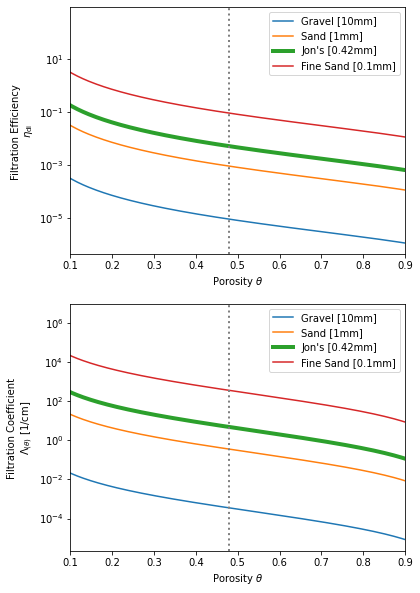

In [7]:
fig = plt.figure(figsize=(6,10),facecolor="white");
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
for i in range(len(Ratios)):
    Eta = 1.5 * Up/Down * Ratios[i]**2
    Lambda = 0.75 * alpha * Eta * Solids / SandDiameter[i]
    ax1.plot(Porosity,Eta,lw=LineWidths[i])
    ax2.plot(Porosity,Lambda,lw=LineWidths[i])
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0.1,0.9)
ax2.set_xlim(0.1,0.9)
ax1.legend(SandLabels)
ax2.legend(SandLabels)
ax1.axvline(x=PorositySand,ls="dotted",lw=2,c="gray")
ax2.axvline(x=PorositySand,ls="dotted",lw=2,c="gray")
ax1.set_xlabel("Porosity $\\theta$ ")
ax1.set_ylabel("Filtration Efficiency \n$\\eta_{\\rm di}$ ")
ax2.set_xlabel("Porosity $\\theta$ ")
ax2.set_ylabel("Filtration Coefficient \n$\\Lambda_{(\\theta)}$ [1/cm] ")

plt.show()

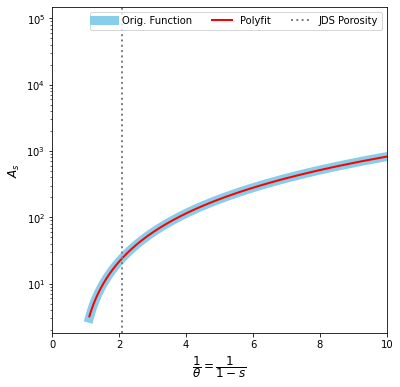

In [8]:
fig = plt.figure(figsize=(6,6),facecolor="white");
ax2 = plt.subplot(1,1,1)
As = Up/Down
ax2.plot(1/Porosity,As,lw=9,c='skyblue',label="Orig. Function")

Fit = np.polyfit(1/Porosity,As,2)

X1 = Fit[0] * (1/Porosity)**2
X2 = Fit[1] * (1/Porosity)
X3 = Fit[2] 

ax2.plot(1/Porosity,X1+X2+X3,lw=2,c='red',\
         label="Polyfit")
ax2.set_xlabel("$\\dfrac{1}{\\theta} = \\dfrac{1}{1-s}$ ",size="large")
ax2.set_xlim(0,10)
ax2.set_ylabel("$A_s$",size="large")
#ax2.annotate("$%.1f \\dfrac{1}{\\theta^2} %.1f \\dfrac{1}{\\theta}$ + %.1f" \
#         %(Fit[0],Fit[1],Fit[2]),\
#         xy=(7, 30),\
#         ha='center',fontsize="large",bbox=dict(facecolor='red', alpha=0.2))

#ax2.annotate("$\\dfrac{3}{2} \\left( \\dfrac{2(1-s^{5/3})}{2-3s^{1/3}+3s^{5/3}-2s^2} \\right)$",\
#         xy=(7, 10),\
#         ha='center',fontsize="large",bbox=dict(facecolor='blue', alpha=0.1))

ax2.set_yscale('log')
ax2.axvline(x=1/PorositySand,ls="dotted",lw=2,c="gray",label="JDS Porosity")
ax2.legend(ncol=3)
plt.show()

In [9]:
print(Fit)

[ 8.99992117 -7.49203318  0.4119361 ]


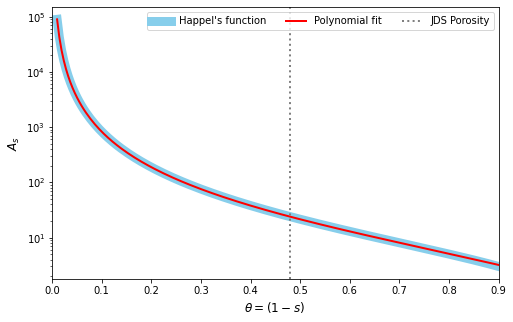

In [10]:
fig = plt.figure(figsize=(8,5),facecolor="white");
ax2 = plt.subplot(1,1,1)
As = Up/Down
ax2.plot(Porosity,As,lw=9,c='skyblue',label="Happel's function")

Fit = np.polyfit(1/Porosity,As,2)

X1 = Fit[0] * (1/Porosity)**2
X2 = Fit[1] * (1/Porosity)
X3 = Fit[2] 

ax2.plot(Porosity,X1+X2+X3,lw=2,c='red',\
         label="Polynomial fit")
ax2.set_xlabel("$\\theta = (1-s)$ ",size="large")
ax2.set_ylabel("$A_s$",size="large")
#ax2.annotate("$%.1f \\dfrac{1}{\\theta^2} %.1f \\dfrac{1}{\\theta}$ + %.1f" \
#         %(Fit[0],Fit[1],Fit[2]),\
#         xy=(7, 30),\
#         ha='center',fontsize="large",bbox=dict(facecolor='red', alpha=0.2))

#ax2.annotate("$\\dfrac{3}{2} \\left( \\dfrac{2(1-s^{5/3})}{2-3s^{1/3}+3s^{5/3}-2s^2} \\right)$",\
#         xy=(7, 10),\
#         ha='center',fontsize="large",bbox=dict(facecolor='blue', alpha=0.1))

ax2.set_yscale('log')
ax2.axvline(x=PorositySand,ls="dotted",lw=2,c="gray",label="JDS Porosity")
ax2.legend(ncol=3)
ax2.set_xlim(0,0.9)
plt.show()

In [13]:
EtaLong_1 = np.log(2.4)+np.log(0.55)+np.log(0.475)
U = 4.0E-5 #m/s
A = 1.0E-20 #J
kBoltz = 1.38E-23#1.380649E-23 #J/K
Temp = 273.0+25.0 #K
rho_clay = 1050 #kg/m3
rho = 997 #kg/m3
g = 9.81 #m/s2
mu = 0.89E-3 #Ns/m
D = kBoltz*Temp/(6*np.pi*mu*ClayRadio)
print("%.2E"%(D*100*100))
NPe = U*d/D
print(NPe)
Nvdw = A/(kBoltz*Temp)
print(Nvdw)
Ngr = 4.0*np.pi/3.0 * (ClayRadio**4) * (rho_clay - rho) * g / (kBoltz*Temp)
print(Ngr)


9.81E-10
171334.59788617812
2.431670071004766
20.68703124975863


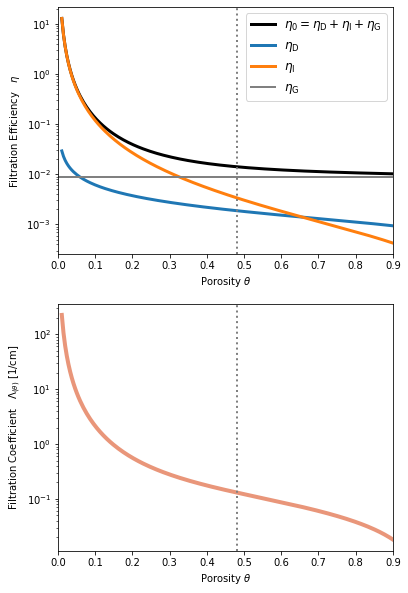

In [14]:
fig = plt.figure(figsize=(6,10),facecolor="white");
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
for i in [2]:
    NR = Ratios[i]
    EtaDiff = np.exp( \
                     np.log(2.4)\
                     + (1./3.)*np.log(As)
                     - 0.081*np.log(NR)\
                     - 0.715*np.log(NPe)\
                     + 0.052*np.log(Nvdw))
    
    EtaInte = np.exp( \
                     np.log(0.55)\
                     + np.log(As)
                     + 1.550*np.log(NR)\
                     - 0.125*np.log(NPe)\
                     + 0.125*np.log(Nvdw))
    
    EtaGrav = np.exp( \
                     np.log(0.475)\
                     - 1.350*np.log(NR)\
                     - 1.110*np.log(NPe)\
                     + 0.053*np.log(Nvdw)\
                     + 1.110*np.log(Ngr))

    Eta = EtaDiff + EtaInte + EtaGrav
    
    Lambda = 0.75 * alpha * Eta * Solids / (SandDiameter[i]*100)
    
    ax1.plot(Porosity,Eta,lw=3,label="$\\eta_{\\rm 0} = \\eta_{\\rm D} + \\eta_{\\rm I} + \\eta_{\\rm G}$",c="black")
    ax1.plot(Porosity,EtaDiff,lw=3,label="$\\eta_{\\rm D}$")
    ax1.plot(Porosity,EtaInte,lw=3,label="$\\eta_{\\rm I}$")
    ax1.axhline(y=EtaGrav,lw=2,label="$\\eta_{\\rm G}$",c="gray")
    ax2.plot(Porosity,Lambda,lw=LineWidths[i],c="darksalmon")
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0,0.9)
ax2.set_xlim(0,0.9)
ax1.legend(fontsize="large",ncol=1)
ax1.axvline(x=PorositySand,ls="dotted",lw=2,c="gray")
ax2.axvline(x=PorositySand,ls="dotted",lw=2,c="gray")
ax1.set_xlabel("Porosity $\\theta$ ")
ax1.set_ylabel("Filtration Efficiency   $\\eta$ ")
ax2.set_xlabel("Porosity $\\theta$ ")
ax2.set_ylabel("Filtration Coefficient   $\\Lambda_{(\\theta)}$ [1/cm] ")

plt.show()